# Reinforcement Learning
强化学习的整体思想有点类似控制理论，即通过让agent与enviroment进行交互，使得return最大化。
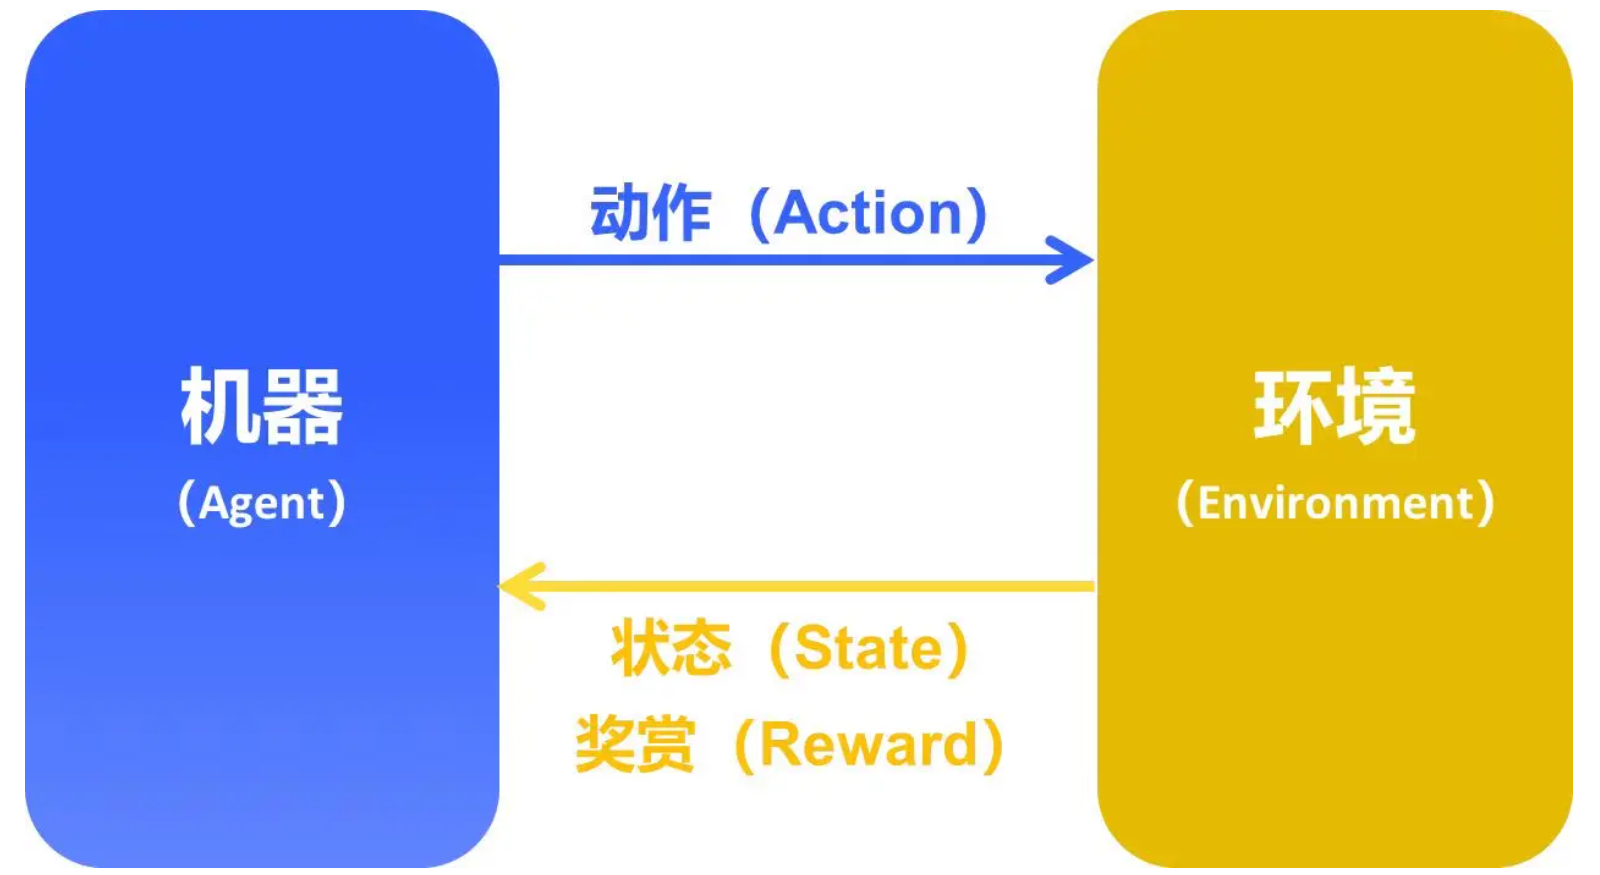    
## 1.Basic Concepts
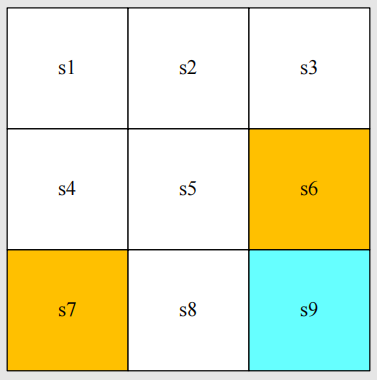    
`State`：agent在环境中说表现出来的状态，即$S_1,S_2,...,S_9$。其可能是个向量，包含多个信息，如位置、速度、加速度等。所有的State组成的集合称为`State Space`,即$S=\{S_1,S_2,...,S_9\}$。    

`Action`：agent在State下可以采取的动作，如上图每个State可以采取的动作有向左、向右、向上、向下、静止这5个Action。所有的Action组成的集合称为`Action Space`，即$A(S_i)=\{A_1,A_2,...,A_5\}$。由于Action与State密切相关，所以$A$表现为$S_i$的函数。  

`State Transition`：agent采取$a$从$s$到$s'$的过程。表现为概率形式称为`State Transition posibility`,即$P(s'|s,a)$。   
 
`Policy`：告诉agent在State要采取什么Action，记为$\pi(a|s)$。    

`Reward`：agent没执行一个Action所获得的奖励，其可以是一个确定值，也可以是一个随机值，且与State和Action有关，与下一步的State无关。

`Trajectory`: 其代表着State-Action-Reward序列，可以是有限长也可以是无限长。而当agent按照某个特定的Policy执行时，其可能会到达terminal state而结束，这样一条Trajectory称为`Episode`。

`Return`: 把Trajectiry的Reward累加起来。事实上**Return是用来刻画Policy的好坏的指标**。当Trajectory是无限长时，会导致Return无法收敛，因此引入Discount rate $\gamma$,此时Return定义为$\sum_{t=0}^{\infty}\gamma^tr_t$。进一步分析，当$\gamma$足够小时，随着t增大，$\gamma^t$衰减的越快，故Return主要由近端的Reward决定，进而导致Policy相对**近视**,反之，当$\gamma$足够大时，导致Policy相对**远视**。

基于以上概念，我们引入`Markov Decision Process(MDP)`：
- Markov: 表现为**无历史性**，即当前状态只依赖于当前状态，不依赖于之前的状态。
$
\begin{array}{l}
p\left(s_{t+1} \mid a_{t+1}, s_{t}, \ldots, a_{1}, s_{0}\right) = p\left(s_{t+1} \mid a_{t+1}, s_{t}\right), \\
p\left(r_{t+1} \mid a_{t+1}, s_{t}, \ldots, a_{1}, s_{0}\right) = p\left(r_{t+1} \mid a_{t+1}, s_{t}\right).
\end{array}
$   
- Decision:可表现为Policy，agent在State下采取Action的概率。
- Process:由State $S$、Action $A(s)$、Reward $R(s,a)$、State Transition posibility $P(s'|s,a)$、Reward posibility $P(r|s,a)$组成。


## 2.Bellman Equation 
我们定义`State Value (Function)`为：
$$
v_{\pi}(s) = \mathbb{E}\left[G_{t} \mid S_{t} = s\right]
$$
其中$G_t$为agent沿着一条Trajectory的Return。我们对从$s$出发所有的$G_t$求平均（期望），即得到`State Value`。其与初始状态$s$和策略$\pi$有关。事实上，当只存在一条trajectory时，State Value等于Return。   
为了描述不同State之间State Value的关系，对于**每一个State**,我们引入贝尔曼公式：   
$$
\begin{aligned}
v_{\pi}(s) &= \mathbb{E}\left[R_{t+1} \mid S_{t}=s\right] + \gamma \mathbb{E}\left[G_{t+1} \mid S_{t}=s\right], \\
&= \underbrace{\sum_{a} \pi(a \mid s) \sum_{r} p(r \mid s, a) r}_{\text{mean of immediate rewards}} + \underbrace{\gamma \sum_{a} \pi(a \mid s) \sum_{s'} p(s' \mid s, a) v_{\pi}(s')}_{\text{mean of future rewards}}, \\
&= \sum_{a} \pi(a \mid s) \left[ \sum_{r} p(r \mid s, a) r + \gamma \sum_{s'} p(s' \mid s, a) v_{\pi}(s') \right], \quad \forall s \in \mathcal{S}.
\end{aligned}
$$
其中$\pi(a \mid s)$为Policy，而$p(r \mid s, a)$为Reward posibility，$p(s' \mid s, a)$为State Transition posibility，这两个概率叫做`model`，根据model是否已知，我们把RL分为`model-free`和`model-based`两种。    
我们令：   
$$
\begin{aligned}
r_{\pi}(s) &\doteq \sum_{a \in \mathcal{A}} \pi(a \mid s) \sum_{r \in \mathcal{R}} p(r \mid s, a) r, \\
p_{\pi}(s' \mid s) &\doteq \sum_{a \in \mathcal{A}} \pi(a \mid s) p(s' \mid s, a).
\end{aligned}
$$   
事实上，前者为**immediate reward**，后者为**state transition probability**。重写贝尔曼公式：  
$$
v_{\pi}(s) = r_{\pi}(s) + \gamma \sum_{s' \in \mathcal{S}} p_{\pi}(s' \mid s) v_{\pi}(s')
$$ 
对于每一个State都满足贝尔曼公式，即我们会得到$|S|$个公式。我们可以把这些公式写成矩阵形式：   
$$
v_{\pi} = r_{\pi} + \gamma P_{\pi} v_{\pi}
$$
其中$v_{\pi}$和$r_{\pi}$为列向量，$P_{\pi}$是由State Transition posibility组成的方阵，$[P_{\pi}]_{ij}$为$p_{\pi}(s'=s_j \mid s=s_i)$。展开表现为：
$$
\underbrace{\left[\begin{array}{l}
v_{\pi}\left(s_{1}\right) \\ 
v_{\pi}\left(s_{2}\right) \\ 
v_{\pi}\left(s_{3}\right) \\ 
v_{\pi}\left(s_{4}\right)
\end{array}\right]}_{v_{\pi}} = 
\underbrace{\left[\begin{array}{l}
r_{\pi}\left(s_{1}\right) \\ 
r_{\pi}\left(s_{2}\right) \\ 
r_{\pi}\left(s_{3}\right) \\ 
r_{\pi}\left(s_{4}\right)
\end{array}\right]}_{r_{\pi}} + 
\gamma \underbrace{\left[\begin{array}{llll}
p_{\pi}\left(s_{1} \mid s_{1}\right) & p_{\pi}\left(s_{2} \mid s_{1}\right) & p_{\pi}\left(s_{3} \mid s_{1}\right) & p_{\pi}\left(s_{4} \mid s_{1}\right) \\
p_{\pi}\left(s_{1} \mid s_{2}\right) & p_{\pi}\left(s_{2} \mid s_{2}\right) & p_{\pi}\left(s_{3} \mid s_{2}\right) & p_{\pi}\left(s_{4} \mid s_{2}\right) \\
p_{\pi}\left(s_{1} \mid s_{3}\right) & p_{\pi}\left(s_{2} \mid s_{3}\right) & p_{\pi}\left(s_{3} \mid s_{3}\right) & p_{\pi}\left(s_{4} \mid s_{3}\right) \\
p_{\pi}\left(s_{1} \mid s_{4}\right) & p_{\pi}\left(s_{2} \mid s_{4}\right) & p_{\pi}\left(s_{3} \mid s_{4}\right) & p_{\pi}\left(s_{4} \mid s_{4}\right)
\end{array}\right]}_{P_{\pi}} 
\underbrace{\left[\begin{array}{l}
v_{\pi}\left(s_{1}\right) \\ 
v_{\pi}\left(s_{2}\right) \\ 
v_{\pi}\left(s_{3}\right) \\ 
v_{\pi}\left(s_{4}\right)
\end{array}\right]}_{v_{\pi}}
$$

对贝尔曼公式的求解实际上是解得State Value，进而我们可以评估当前的Policy。以下提出两种方法来求解：
- 矩阵方程求解(简单直白)：
$$
v_{\pi} = \left(I - \gamma P_{\pi}\right)^{-1} r_{\pi}
$$
可以证明$(I - \gamma P_{\pi})^{-1}$始终存在。但是当维度过高时，求逆的计算量太大。
- 迭代法求解(效率高)：
$$
v_{k+1} = r_{\pi} + \gamma P_{\pi} v_{k}, \quad k = 0, 1, 2, \ldots
$$
可以证明(压缩映射理论)，当迭代次数足够大，即$k \rightarrow \infty$时，$v_{\pi}$收敛到$(I - \gamma P_{\pi})^{-1}$。

State Value是agent从某个State出发所得到的平均期望，为了得到具体采取某个action对应的期望，我们定义`Action Value (Function)`：
$$
q_{\pi}(s, a) \doteq \mathbb{E}\left[G_{t} \mid S_{t}=s, A_{t}=a\right]
$$
对比State Value和Action Value的定义：
$$
\underbrace{\mathbb{E}\left[G_{t} \mid S_{t}=s\right]}_{v_{\pi}(s)} = \sum_{a \in \mathcal{A}} \underbrace{\mathbb{E}\left[G_{t} \mid S_{t}=s, A_{t}=a\right]}_{q_{\pi}(s,a)} \pi(a \mid s)
$$
上式可以表明，Stade Value等于在Policy下所有Action Value的加权和，对照贝尔曼公式，我们可以得到：
$$
q_{\pi}(s, a) = \sum_{r \in \mathcal{R}} p(r \mid s, a) r + \gamma \sum_{s' \in \mathcal{S}} p(s' \mid s, a) v_{\pi}(s')
$$


## 3.Bellman Optimality Equation
RL的核心目的是找到最优Policy，我们定义**如果某个Policy下对应的State Value大于其它任何Policy下对应的State Value，则该Policy为最优Policy**。而贝尔曼最优公式给出了如何求解最优Policy。
$$
\begin{aligned}
v(s) &= \max_{\pi(s) \in \Pi(s)} \sum_{a \in \mathcal{A}} \pi(a \mid s) \left( \sum_{r \in \mathcal{R}} p(r \mid s, a) r + \gamma \sum_{s' \in \mathcal{S}} p(s' \mid s, a) v(s') \right) \\
&= \max_{\pi(s) \in \Pi(s)} \sum_{a \in \mathcal{A}} \pi(a \mid s) q(s, a)
\end{aligned}
$$
写成矩阵形式： 
$$
v = \max_{\pi \in \Pi} \left( r_{\pi} + \gamma P_{\pi} v \right)
$$
这个公式乍一看不好理解，因为似乎我们要通过一个式子求解两个未知数$v$和$\pi$。我们可以通过以下几步来求解：     
1、给等式右边的v(s`)赋一个初值    
2、求解最优化问题$\ \max_{\pi(s) \in \Pi(s)} \sum_{a \in \mathcal{A}} \pi(a \mid s) q(s, a)$,可证明其解为：
$$
\pi(a \mid s) = \begin{cases} 
1, & a = a^{*} \\ 
0, & a \neq a^{*}
\end{cases}
$$     
其中$a^{*}$对应$q(s, a^{*})$最大的Action。    
3、利用压缩映射原理，迭代求解得到$v^*$，直到收敛：
$$
v_{k+1} = f(v_{k}) = \max_{\pi \in \Pi} \left( r_{\pi} + \gamma P_{\pi} v_{k} \right), \quad k = 0, 1, 2, \ldots
$$

## 4.Model-Based RL
`Value iteration algorithm`:基于贝尔曼最优公式，我们将算法分为Policy update和Value update两个步骤,具体如下：
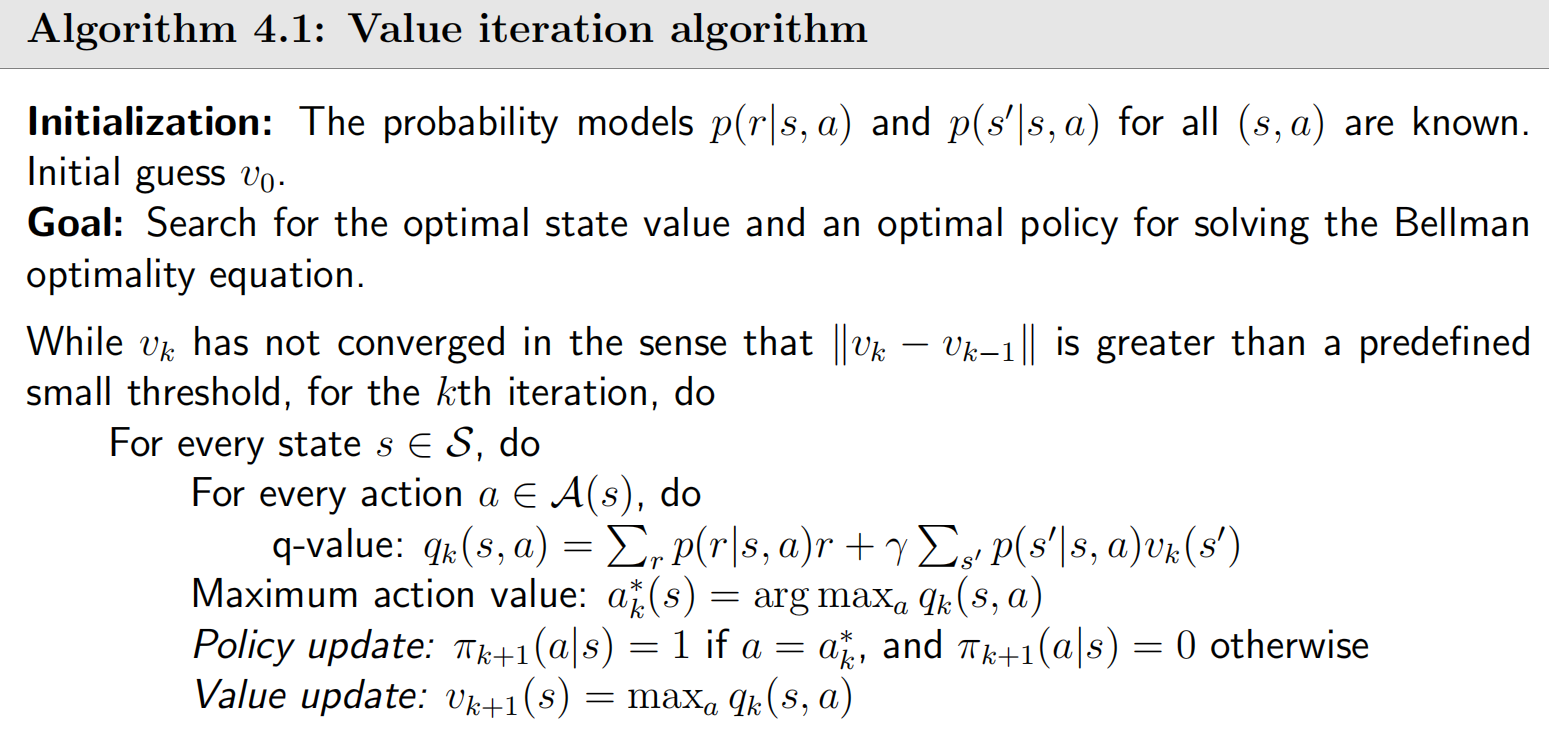     
`Policy iteration algorithm`:Value iteration algorithm是直接从一个初始的State Value开始的，而Policy iteration algorithm则是从一个初始的Policy开始的，通过迭代**无穷多次**求解贝尔曼公式先求出一个State Value，这一步可以理解为一个**策略评估**，然后在优化Policy，具体如下：
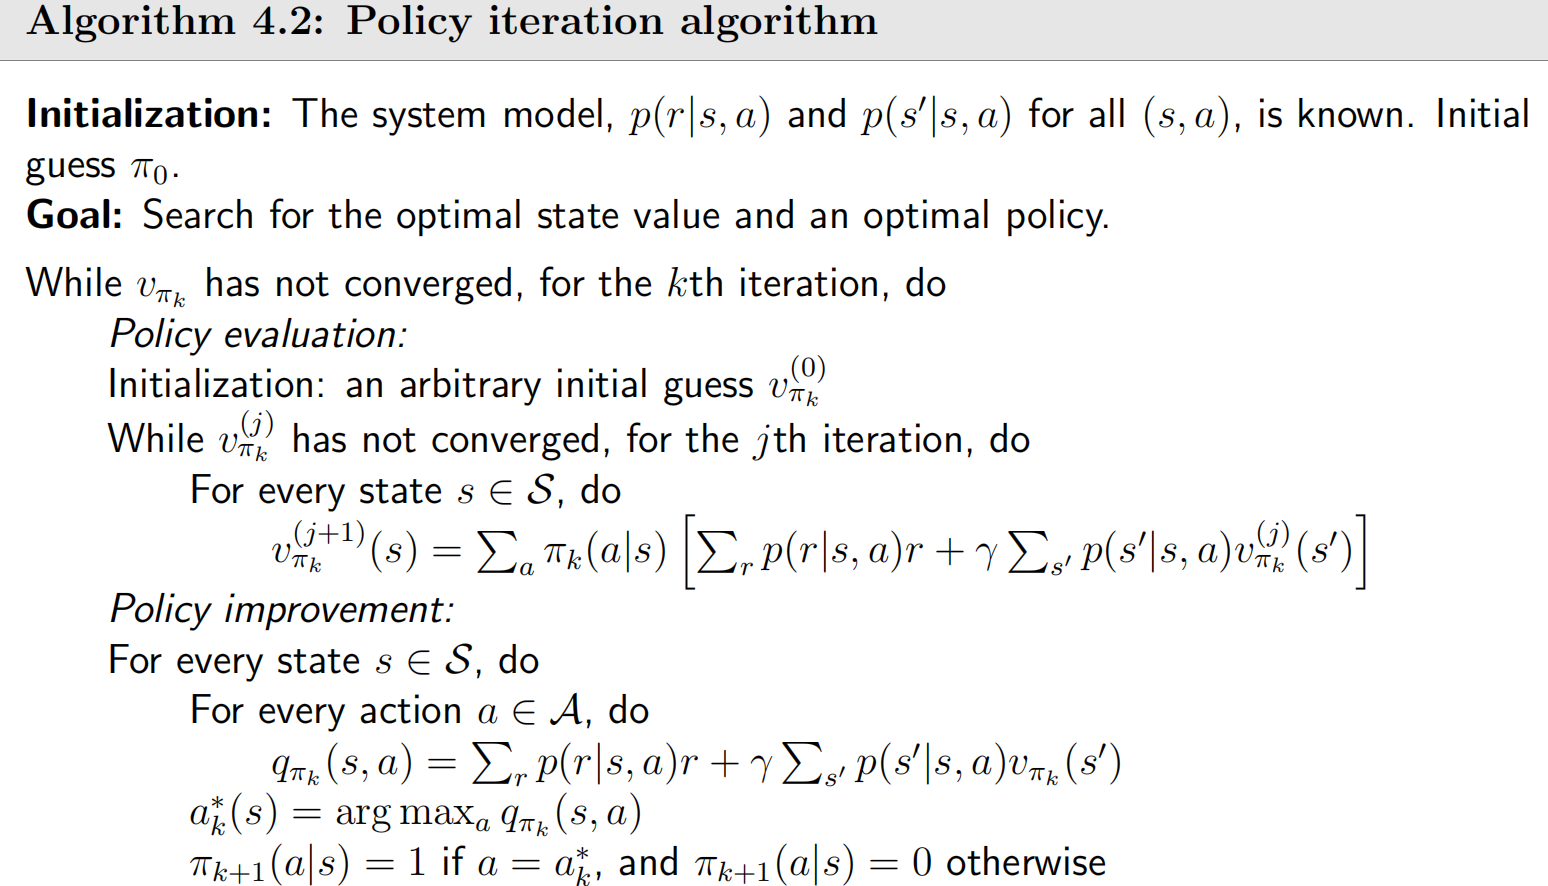    
而当我们求解贝尔曼公式的迭代次数是有限次时，则为`truncated policy iteration algorithm`     
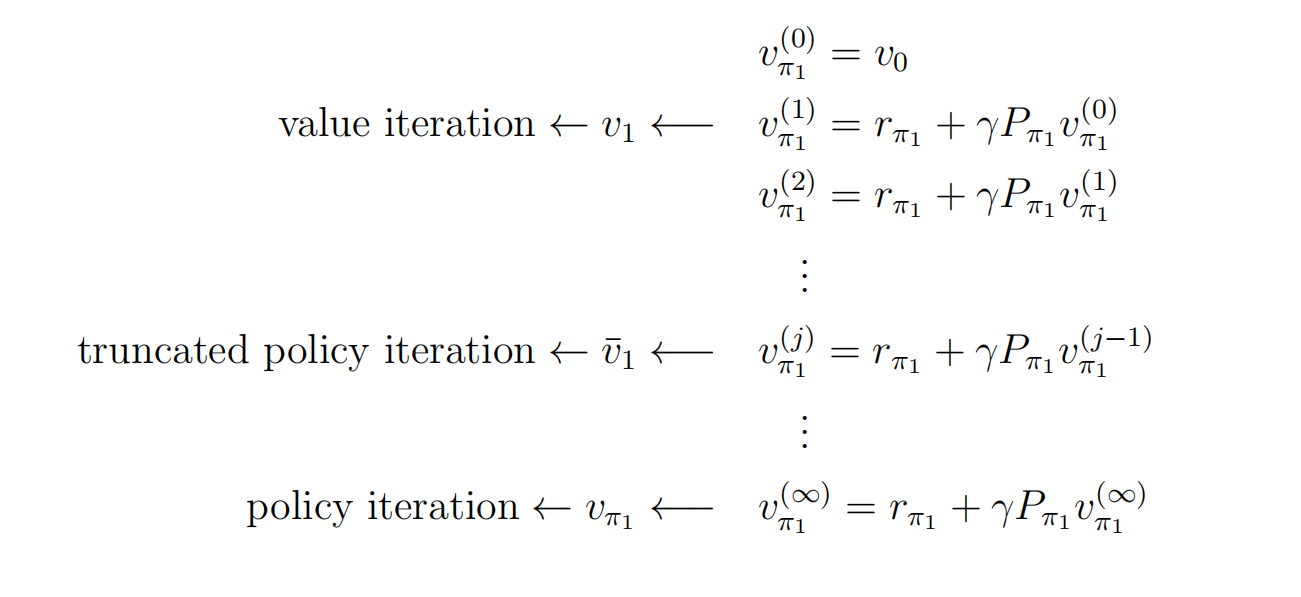



## 5.Monte Carlo Methods
当我们不知道环境的状态转移矩阵，即$P(r|s,a)$和$P(s`|s,a)$时，我们可以基于**数据**来评估期望(大数定律)，这样一种方法统称为蒙特卡洛方法。    
从Model-Based到Model-Free的一个基本想法是将Policy Iteration中的Model-Based部分替换掉，我们先回想一下Policy Iteration的过程：   
1. Policy Evaluation：通过初始策略并结合贝尔曼方程从而解出State Value
2. Policy Improvement：通过找到最大的action value来更新策略
   
其中关键在于得到action value,而在没有模型的情况下，我们可以回归action value的定义：  
$$
\begin{aligned}
q_{\pi_{k}}(s, a) &= \mathbb{E}\left[G_{t} \mid S_{t}=s, A_{t}=a\right] \\
&= \mathbb{E}\left[R_{t+1} + \gamma R_{t+2} + \gamma^{2} R_{t+3} + \cdots \mid S_{t}=s, A_{t}=a\right]
\end{aligned}
$$
结合蒙特卡洛方法，我们有：
- 从s出发，依据Policy $\pi_{k}$生成episode
- 计算return，记作g(s,a)，即为一次采样
- 重复上面多次采样，求平均

$$
q_{\pi_{k}}(s, a) = \mathbb{E}\left[G_{t} \mid S_{t}=s, A_{t}=a\right] \approx \frac{1}{N}\sum_{i=1}^{N} g^{(i)}(s,a).
$$
这样我们就直接得到了action value(Policy Iteration中是通过state value来计算action value的)，**注意**：每一个state都有|A|个action value,Policy影响的是之后的action的选择，当前state下的policy不影响action value的计算。以下给出MC Basic的完整算法：   
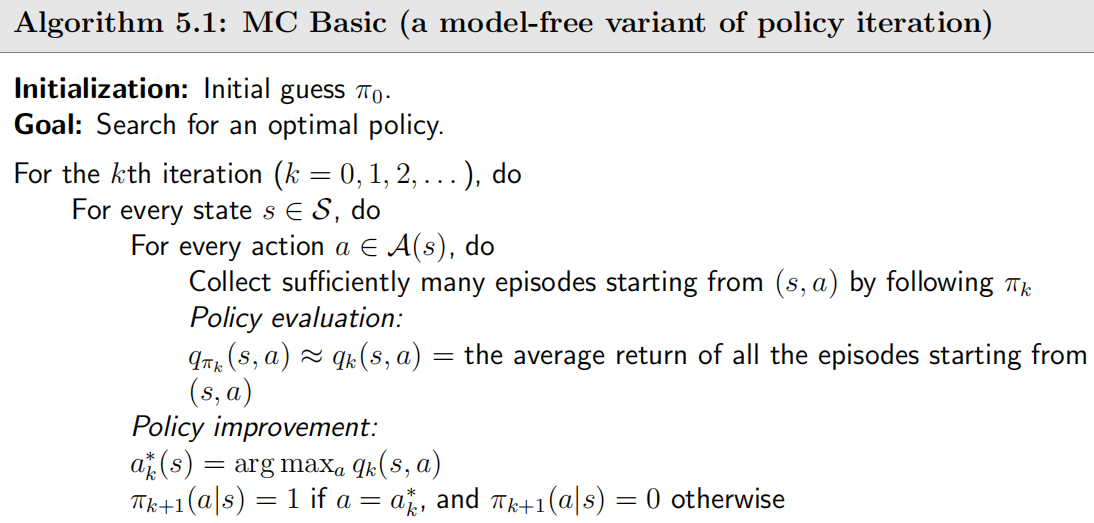       
这里需要关注episode的长度，为了保证其是有限长，我们需要进行合理的设置，当episode太短时，只有靠近目标的state才有非0的state value，只有当足够长时，离目标点远的state才能慢慢达到最优。     
上面这种方法虽然简单直接，但是效率低下。假设我们得到episode:
$$
S_{1} \xrightarrow{a_{2}} S_{2} \xrightarrow{a_{4}} S_{1} \xrightarrow{a_{2}} S_{2} \xrightarrow{a_{3}} S_{5} \xrightarrow{a_{1}} \cdots
$$   
不难发现，这样一条episode不仅可以评估$q_{\pi}(s_1,a_2)$，还可以评估$q_{\pi}(s_2,a_4)$，$q_{\pi}(s_1,a_2)$，$q_{\pi}(s_2,a_3)$等等，这样就能充分利用episode中的信息。    
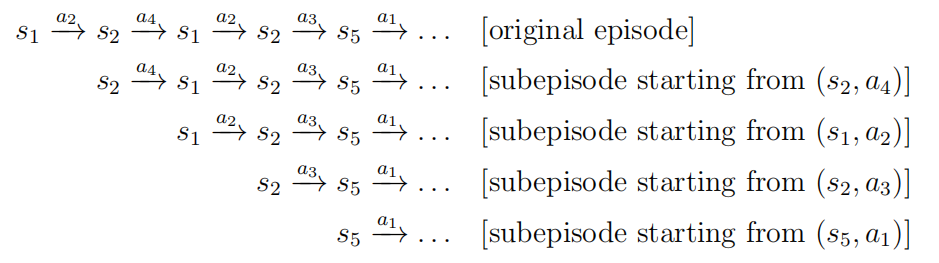    
当某一个(s,a)在episode中出现多次时，如果我们只对第一次出现的(s,a)更新，这种方法叫做`first visit method`，相反，如果对于每一个(s,a)都更新，这种方法叫做`every visit method`。     
在进行策略迭代时，如果我们要等所有的episode都访问完，再求平均得到action value，效率会太慢，而如果我们结合随机梯度下降的思想，每访问一个episode后我们就更新策略，效率将提升。以下是`MC Exploring Starts`完整流程： 
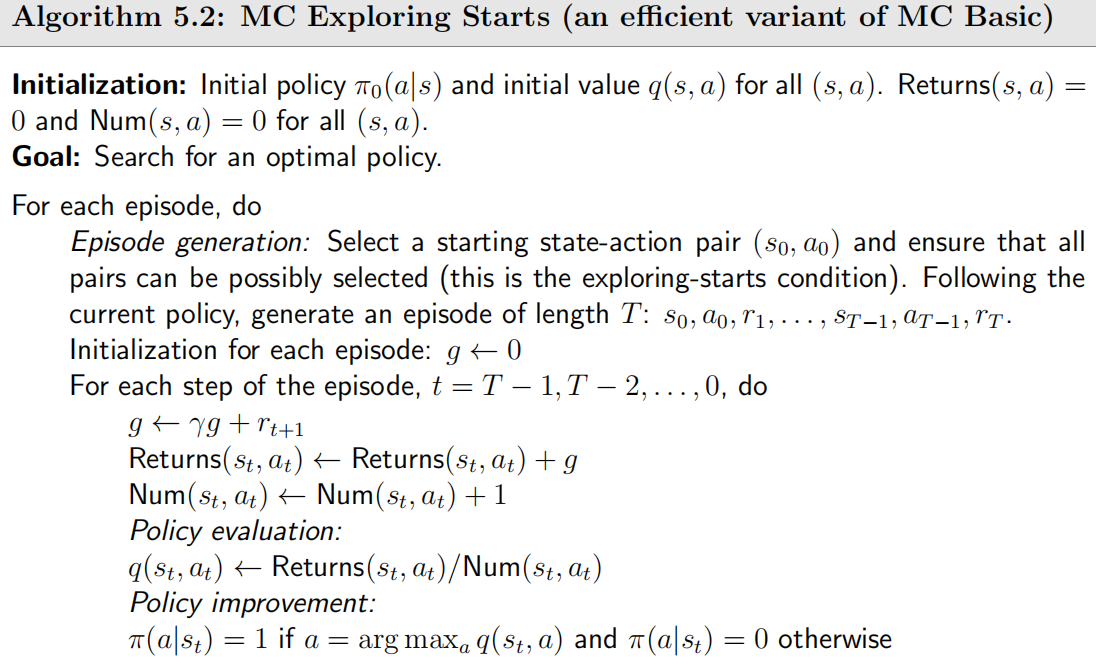    
注意**t是从后面开始的**，这是为了防止重复计算episode靠后面的reward。   
事实上，到这里我们得到两个重要的概念:    
- `exploring`:我们要尽量通过episode来explore所有的(s,a)，这样才能评估所有的action value，以找到最优策略。
- `start`:我们可以基于每一个(s,a)出发来生成episode(实际应用中很难实现)，也可以通过别的(s,a)出发来生成episode，而这个episode是否会经过当前(s,a)不能确保。     

为了解决exploring start的问题，我们引入**soft Policy**,这种思想有点类似于模拟退火，我们在采取最大action value对应的action时，同时也给予一定概率采取其它action。因此在访问一个比较长的episode时，我们可以得到所有的(s,a)，这样可以大大减少episode的数量。    
引入`ε-greedy policy`:
$$
\pi(a \mid s) = \left\{
\begin{array}{ll}
1 - \frac{\epsilon}{|\mathcal{A}(s)|}(|\mathcal{A}(s)| - 1), & \text{for the greedy action,} \\
\frac{\epsilon}{|\mathcal{A}(s)|}, & \text{for the other } |\mathcal{A}(s)| - 1 \text{ actions,}
\end{array}
\right.
$$
其中ε介于0到1之间，可以理解为**探索度**，当其足够小时(例如ε=0，则为greedy policy)，探索度小，保证了最优性；当其足够大时(例如ε=1，则为均匀分布选取action)，探索度大，丢失了最优性。因此**ε不能太大**,或者在最开始的时候 ε 比较大，探索性比较强，最后 ε 逐渐减小到 0，就可以得到一个最优的策略。     
我们把`ε-greedy policy`和`MC Exploring Starts`结合起来，得到`ε-greedy MC`，算法如下：    
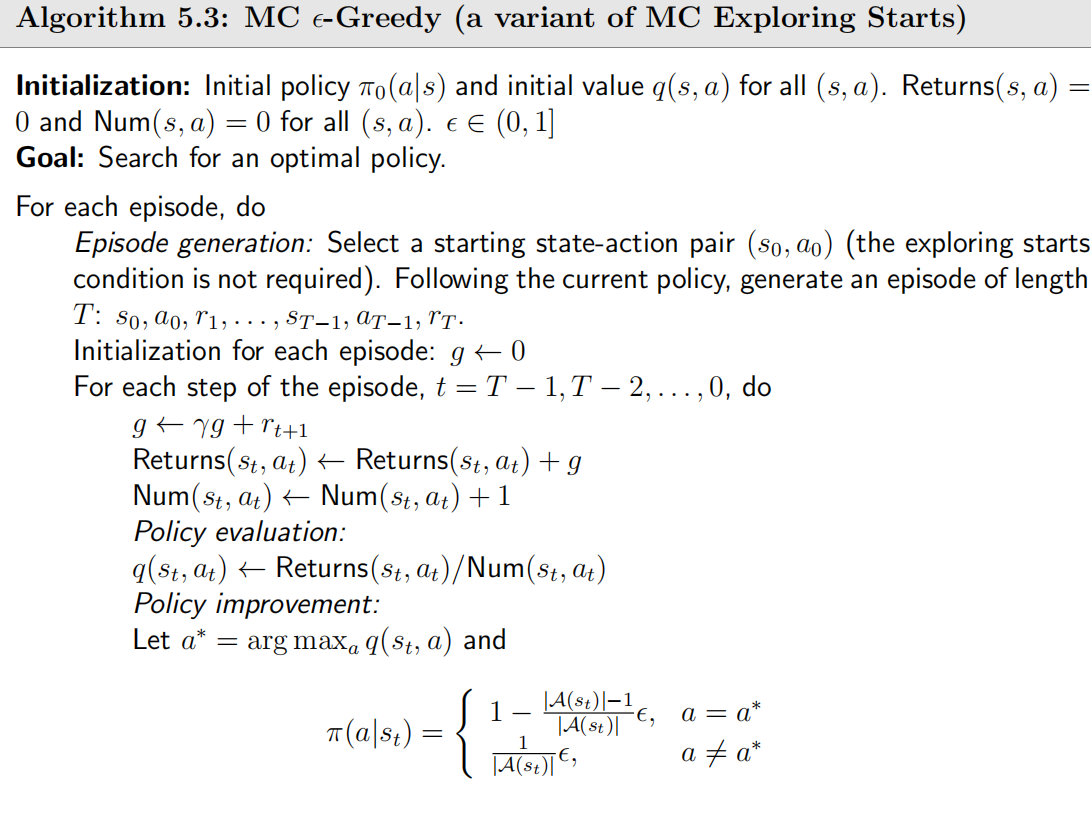    
